In [1]:
!pip install langchain langchain-core langchain-community pydantic duckduckgo-search

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 30.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 53.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 484.9/484.9 kB 33.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 64.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.7/64.7 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.0/51.0 kB 3.8 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.32.4
    Uninstalling requests-2.32.4:
      Successfully uninstalled requests-2.32.4
  Attempting uninstall: langchain-core
    Found existing installation: langchain-core 1.2.1
    Uninstalling langchain-core-1.2.1:
      Successfully uninstalled langchain-core-1.2.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-col

## Why this happens

New versions of langchain-community no longer use duckduckgo-search

They now depend on a new package called ddgs

You installed duckduckgo-search, but ddgs is missing

In [2]:
!pip install -U ddgs

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.3/40.3 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 161.7/161.7 kB 6.2 MB/s eta 0:00:00


## 1. (DuchDuchGo search) ;; now if you need to real time news or data so you can use this Tool

## Note
* tools also are runnable

In [3]:
from langchain_community.tools import DuckDuckGoSearchRun

search_tool= DuckDuckGoSearchRun()
results= search_tool.invoke("today ipl news")

print(results)

Stay current with all the latest and breaking news about IPL , compare headlines and perspectives between news sources on stories happening today . ... news18.cricketnextFollow CricketNext on Facebook: https://www.facebook.com/cricketnextFollow CricketNext on Twitter: ... IPL Today is a news site dedicated specifically to cricket fans around the world. ... Copyright © 2024 IPL LATEST NEWS TODAY & PREDICTION ... IPL Auction 2026 Latest News : Retained Players List, Released Stars & Team Squads ... Introduction In today ’ s fast-paced world, maintaining ... Tag: IPL today matches ... Watch IPL Free- The 17th season of the Indian Premier League ( IPL ) … ... Sports Big News .


In [21]:
print(search_tool.name)
print(search_tool.description)
print(search_tool.args)

duckduckgo_search
A wrapper around DuckDuckGo Search. Useful for when you need to answer questions about current events. Input should be a search query.
{'query': {'description': 'search query to look up', 'title': 'Query', 'type': 'string'}}


## (2) Built-in Tool- Shell Tool

* you have to be very careful bz there may be any file can delete bz you will use command prompt with LLM

In [4]:
!pip install langchain-experimental

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 210.1/210.1 kB 4.3 MB/s eta 0:00:00


In [5]:
from langchain_community.tools import ShellTool

shell_tool= ShellTool()

results= shell_tool.invoke("whoami")

print(results)

Executing command:
 whoami
root



/usr/local/lib/python3.12/dist-packages/langchain_community/tools/shell/tool.py:33: UserWarning: The shell tool has no safeguards by default. Use at your own risk.
  warnings.warn(


## can search more :: https://docs.langchain.com/oss/python/integrations/tools

## How to build custom Tools in langchain; (only need to build if you think there is not any such build -in tool
* A custom tool is a tool that you  define yourself
-> Use them when
* * You want to call your own APIs
* * You want to **encapsulate business logic**
* * You want the LLM to interact with **Your database, product, or app**

## In langchain there are multiple way to make your custom tool

## Custom Tools

In [6]:
from langchain_core.tools import tool

In [7]:
# step 1 - create a function

## Let your llm don't know how two numbers multiply

def multiply(a, b):
  """ Multiply two numbers""" # not needed but highly recommended to give this doc string, so in future our llm will understand what this fn exactly do
  return a* b

In [8]:
# step 2 - add type hints (lly recommended)

def multiply(a:int, b:int) -> int:
  """ Multiply two numbers """
  return a*b

In [10]:
# step3 - add tool decorator

@tool
def multiply(a:int, b:int) -> int: # it will also help in validataion parameter
  """ Multiply two numbers """
  return a*b

# what tool decorator does; it just make our fn to special fn which can be communicated by llm

In [15]:
result= multiply.invoke({'a':4, 'b':5})

print(result)

20


In [18]:
# onw why this fn is became special
print(multiply.name)
print(multiply.description)
print(multiply.args)

# so you will get at these three attribute from any kind of tool;; not only for custom tool also for in-build tool

multiply
Multiply two numbers
{'a': {'title': 'A', 'type': 'integer'}, 'b': {'title': 'B', 'type': 'integer'}}


## now when you give these tools to llm , what llm see in these tool --> model_json_schema --> or you don't send tool directly instead you send tool schema

In [22]:
print(multiply.args_schema.model_json_schema())

{'description': 'Multiply two numbers ', 'properties': {'a': {'title': 'A', 'type': 'integer'}, 'b': {'title': 'B', 'type': 'integer'}}, 'required': ['a', 'b'], 'title': 'multiply', 'type': 'object'}


## some more way to make custome tools

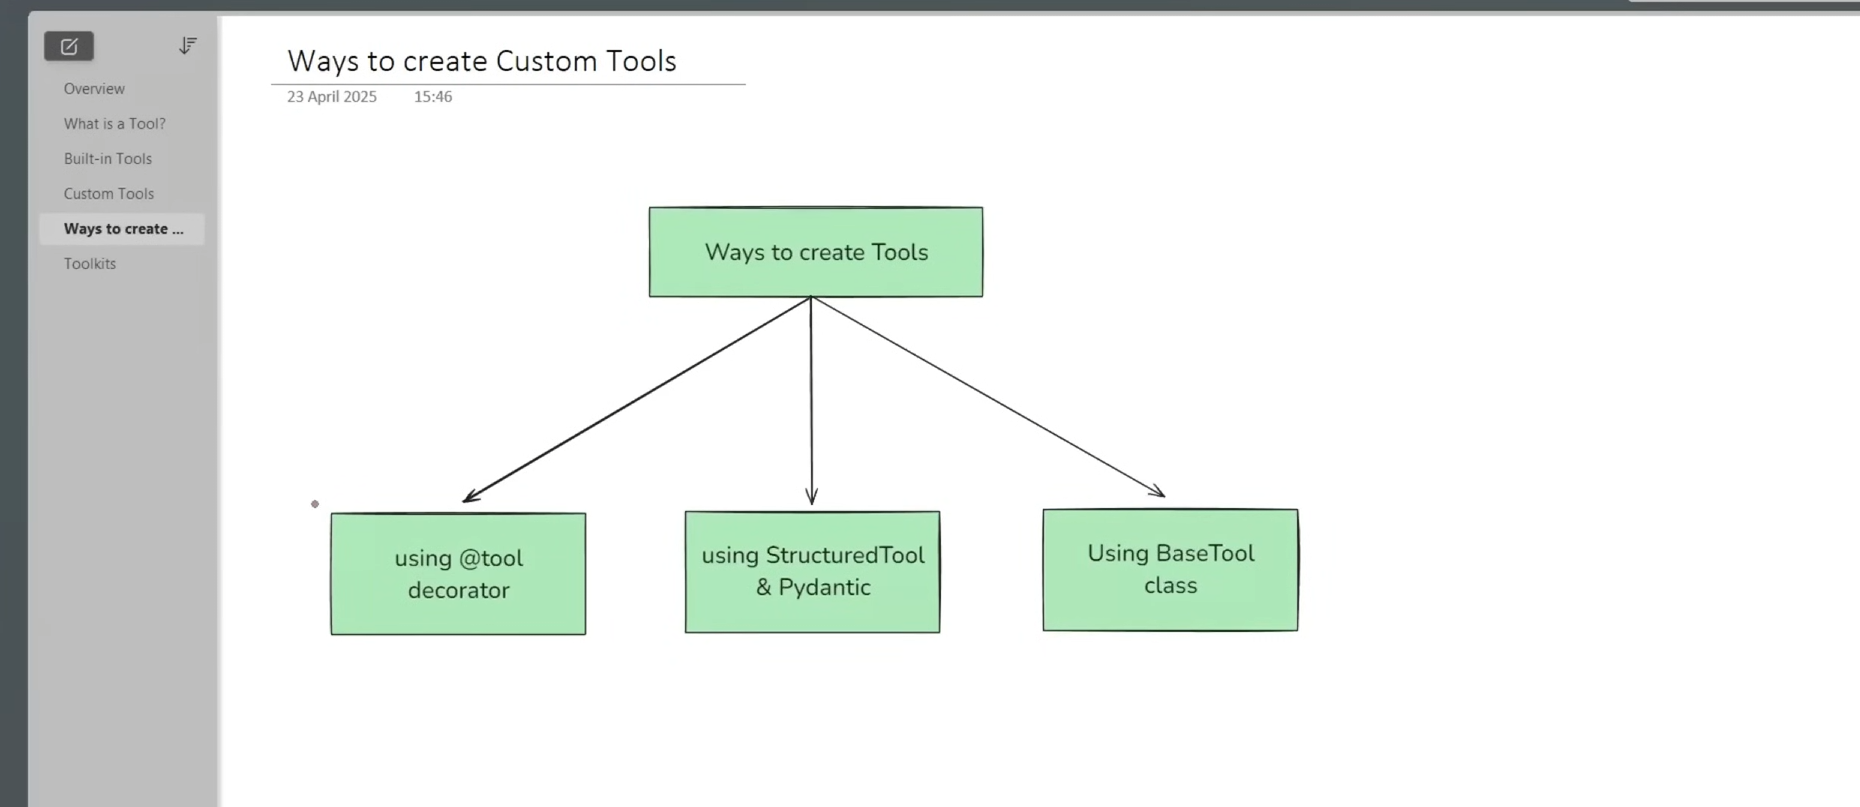

## 2. now try to build a tool using **StructuredTool & Pydantic**

* A-**Structured Tool** in LangChain is special type of tool where the input to the tool follows a structured schema, typically defined using a Pydantic model.

* help us to stricly constrain on args

In [24]:
from langchain_community.tools import StructuredTool
from pydantic import BaseModel, Field

In [25]:
class MultipleInput(BaseModel):
  a:int= Field(required=True, description="The first number in Multiplication")
  b:int= Field(required=True, description="The second number in Multiplication")

def multiply_func(a:int, b:int)->int:
  return a * b



/tmp/ipython-input-261614402.py:2: PydanticDeprecatedSince20: Using extra keyword arguments on `Field` is deprecated and will be removed. Use `json_schema_extra` instead. (Extra keys: 'required'). Deprecated in Pydantic V2.0 to be removed in V3.0. See Pydantic V2 Migration Guide at https://errors.pydantic.dev/2.12/migration/
  a:int= Field(required=True, description="The first number to Multiple")
/tmp/ipython-input-261614402.py:3: PydanticDeprecatedSince20: Using extra keyword arguments on `Field` is deprecated and will be removed. Use `json_schema_extra` instead. (Extra keys: 'required'). Deprecated in Pydantic V2.0 to be removed in V3.0. See Pydantic V2 Migration Guide at https://errors.pydantic.dev/2.12/migration/
  b:int= Field(required=True, description="The second number to Multiple")


In [26]:
multiply_tool= StructuredTool.from_function(
    func=multiply_func,
    name="multiply",
    description="Multiply two numbers",
    args_schema=MultipleInput ## pydantic class for args schema structure validatioin
)

In [27]:
result= multiply_tool.invoke({"a":5, "b":8})
print(result)

40


In [31]:
print(multiply_tool.name)
print(multiply_tool.description)
print(multiply_tool.args)
print(multiply_tool.args_schema.model_json_schema())

multiply
Multiply two numbers
{'a': {'description': 'The first number to Multiple', 'required': True, 'title': 'A', 'type': 'integer'}, 'b': {'description': 'The second number to Multiple', 'required': True, 'title': 'B', 'type': 'integer'}}
{'properties': {'a': {'description': 'The first number to Multiple', 'required': True, 'title': 'A', 'type': 'integer'}, 'b': {'description': 'The second number to Multiple', 'required': True, 'title': 'B', 'type': 'integer'}}, 'required': ['a', 'b'], 'title': 'MultipleInput', 'type': 'object'}


## (3.) Using BaseTool class
* **BaseTool** is the abstract base class for all tools in Langchain. It defines the core structure and interface that any tool must follow, whether it's simple one-liner or a fully customized function.

* All other tool types like @tool, StructuredTool are built on top of BaseTool

In [32]:
from langchain.tools import BaseTool
from typing import Type

In [33]:
# arg schema using pydantic

class MultiplyInput(BaseModel):
  a: int= Field(required=True, description="The first number in multiplication")
  b: int=Field(required=True, description="The second number in multiplication")

/tmp/ipython-input-1116998770.py:4: PydanticDeprecatedSince20: Using extra keyword arguments on `Field` is deprecated and will be removed. Use `json_schema_extra` instead. (Extra keys: 'required'). Deprecated in Pydantic V2.0 to be removed in V3.0. See Pydantic V2 Migration Guide at https://errors.pydantic.dev/2.12/migration/
  a: int= Field(required=True, description="The first number in multiplication")
/tmp/ipython-input-1116998770.py:5: PydanticDeprecatedSince20: Using extra keyword arguments on `Field` is deprecated and will be removed. Use `json_schema_extra` instead. (Extra keys: 'required'). Deprecated in Pydantic V2.0 to be removed in V3.0. See Pydantic V2 Migration Guide at https://errors.pydantic.dev/2.12/migration/
  b: int=Field(required=True, description="The second number in multiplication")


In [34]:
# banifit to use baseTool is here you can use async version of your tool

class MultiplyTool(BaseTool):
  name:str="multiply"
  description:str= "Multiply two numbers"

  args_schema: Type[BaseModel]= MultipleInput  ## basically type of MultipleInput(pydantic schema) is type BaseModel or pydantic base schema

  def _run(self, a:int, b:int)-> int: ## name of fn must be _run
    return a*b

In [35]:
multiply_tool= MultiplyTool()

In [37]:
result= multiply_tool.invoke({"a":5, "b":8})
print(result)

40


In [38]:
print(multiply_tool.name)
print(multiply_tool.description)
print(multiply_tool.args)
print(multiply_tool.args_schema.model_json_schema())

multiply
Multiply two numbers
{'a': {'description': 'The first number to Multiple', 'required': True, 'title': 'A', 'type': 'integer'}, 'b': {'description': 'The second number to Multiple', 'required': True, 'title': 'B', 'type': 'integer'}}
{'properties': {'a': {'description': 'The first number to Multiple', 'required': True, 'title': 'A', 'type': 'integer'}, 'b': {'description': 'The second number to Multiple', 'required': True, 'title': 'B', 'type': 'integer'}}, 'required': ['a', 'b'], 'title': 'MultipleInput', 'type': 'object'}


## Toolkits
* A toolkits is just a collection (bundle) of related tools that serve a common purpose packaged for convenience and reusability.

* In langChain:
* * A toolkit might be : GoogleDriveToolKit
* * And it can contain the following tools **see below pic**

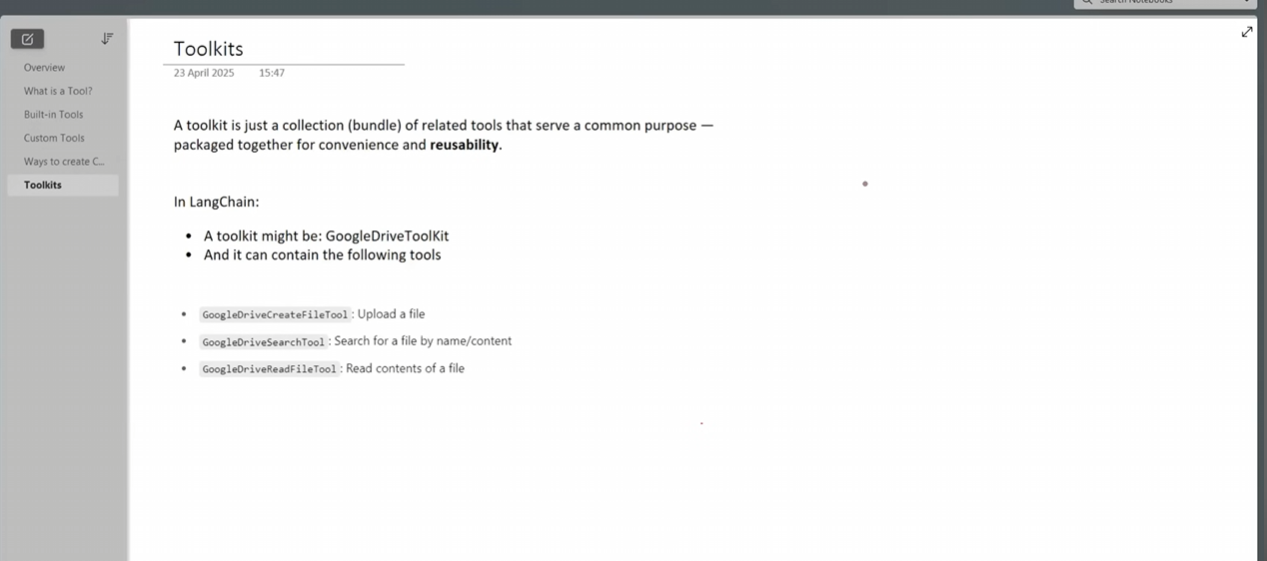

In [39]:
## if there are some tools which are related to each other (not completly) to we can make a toolkit for them ;;eg in above all tool related to google drive
# you can also build you custom toolkits

## main benifit you can use one toolkits in your multiple project once you have build any

## Toolkit

In [40]:
from langchain_core.tools import tool

In [41]:
# custom tools

# both tools are related bz both are doing arithmetic operations

@tool
def add(a:int, b:int) -> int:
  """ Add two numbers """
  return a+b

@tool
def multiply(a:int, b:int) -> int:
  """ Multiply two numbers """
  return a * b

In [42]:
class MathToolkit:
  def get_tools(self):
    return [add, multiply]

In [43]:
toolkit= MathToolkit() # toolkit obj

tools= toolkit.get_tools() ## now you will get all tools which are inside toolkit

# now you can access those tool using loop

for tool in tools:
  print(tool.name, "=>", tool.description)

add => Add two numbers
multiply => Multiply two numbers
